# An introduction to R for psychologists

### Part 1 : General intro

## Summary of the first part

- Presentation and ecosystem
    - Presentation and usage
    - Benefits and caveats
    - comparison with other programming languages
- How R works :
    - Data types and objects
    - Functions
    - Plotting
    - Libraries

R is an __essential__ programming language for quantitative analysis of data

The principle is to translate instructions/commands into outputs

In [1]:
print('hello world')

[1] "hello world"


In [2]:
1+1

[1] 2

## Programming environment

Programming in R comes with a lot of flavours : 


- base R ![](plots/base-r.png)

- R studio ![](plots/rstudio.png)

- Jupyter ... ![](plots/jupyter.png)

## What are the _benefits_ of R :
- Reproducible analysis (including for you)
- Peer review (in theory)
- Cooperative science (packages, public repository, code sharing, R community)
- Integrated analysis (data wrangling/cleaning, plotting, statistics, EEG ?,etc.)
- Large possibilities (simulating entire experiments, writing papers, grading,etc.)

## What are the _caveats_ of R :
- Error prone (but see excel)

- Package maintenance

- steep learning curve (but worth it)

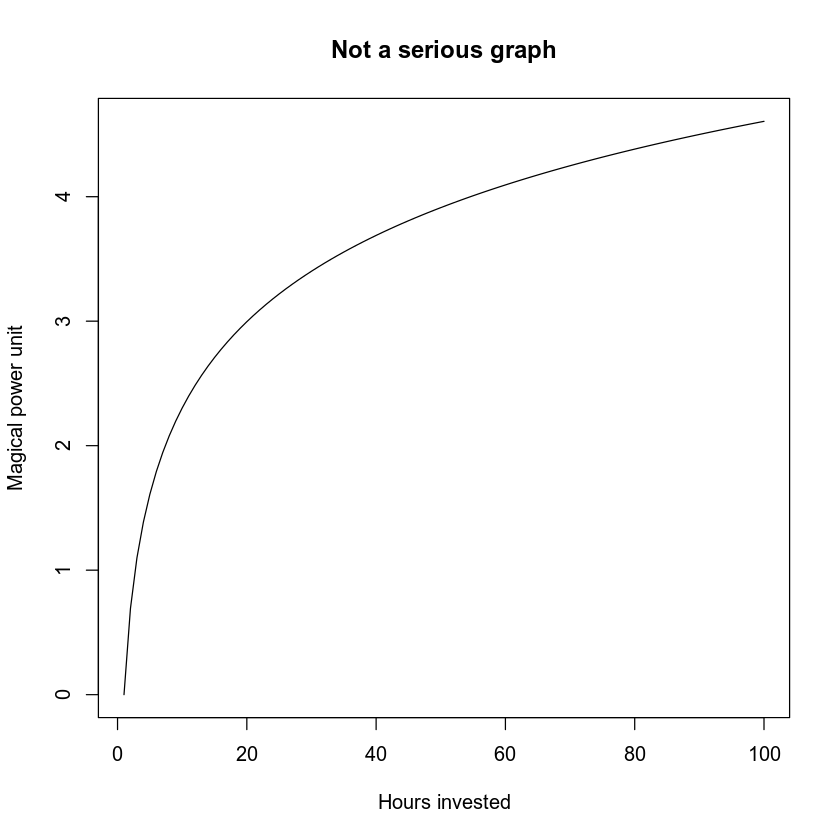

In [3]:
plot(1:100, log(1:100), type = "l", main='Not a serious graph', 
     xlab ='Hours invested', ylab = "Magical power unit")


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/310px-R_logo.svg.png" width="100" > Compared to other programming languages :

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Matlab_Logo.png/267px-Matlab_Logo.png" width="100" >

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/240px-Python-logo-notext.svg.png" width="100" > 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Julia_Programming_Language_Logo.svg/320px-Julia_Programming_Language_Logo.svg.png" width="100">

In [4]:
'R' > 'Matlab ?'

[1] TRUE

# How R works

- Data types and objects
- Functions
- Plotting
- Libraries

# How R works

- Data types of single elements


In [5]:
class(1)#int and float
class('1')
class(TRUE)

[1] "numeric"

[1] "character"

[1] "logical"

# How R works

- Base function on single elements

In [6]:
# Assigning
a <- 2 # or a =2
print(a)


[1] 2


In [7]:
#Reassigning and re-reassigning
a <- a + a
print(a)

[1] 4


In [8]:
ls()

[1] "a"

In [9]:
#removing 
rm(a)

In [10]:
ls()

character(0)

In [11]:
#Operations
sqrt(4)

[1] 2

# How R works

- Collection of elements (or objects) :

Name | dim() |  type
:-------------------------:|:-------------------------:|:-------------------------:
vectors | n | homogeneous
matrix | n x m | homogeneous
list | n | heterogeneous
data.frames | n x m | heterogeneous
factors | n | characters (specific to R)

# How R works

- base function on collections

In [12]:
a <- c(1,2,3)

In [13]:
length(a)

[1] 3

In [14]:
#Indexing
print(a[1]) # 1-indexed
#assigning
a[1] <- 99
print(a[1])


[1] 1
[1] 99


In [15]:
#Operations on collections
a <- c(1,2,3)
sqrt(a)

[1] 1.000000 1.414214 1.732051

In [16]:
sd(a)


[1] 1

In [17]:
a <- matrix(data = 1:9, nrow=3)

In [18]:
print(a)

     [,1] [,2] [,3]
[1,]    1    4    7
[2,]    2    5    8
[3,]    3    6    9


In [19]:
dim(a)

[1] 3 3

In [20]:
print(a[1,3])
print(a[1,])

[1] 7
[1] 1 4 7


In [21]:
#Operations
sqrt(a)

1.000000,2.000000,2.645751
1.414214,2.236068,2.828427
1.732051,2.449490,3.000000


In [22]:
#Operations
mean(a[1,])

[1] 4

## Plotting in base R

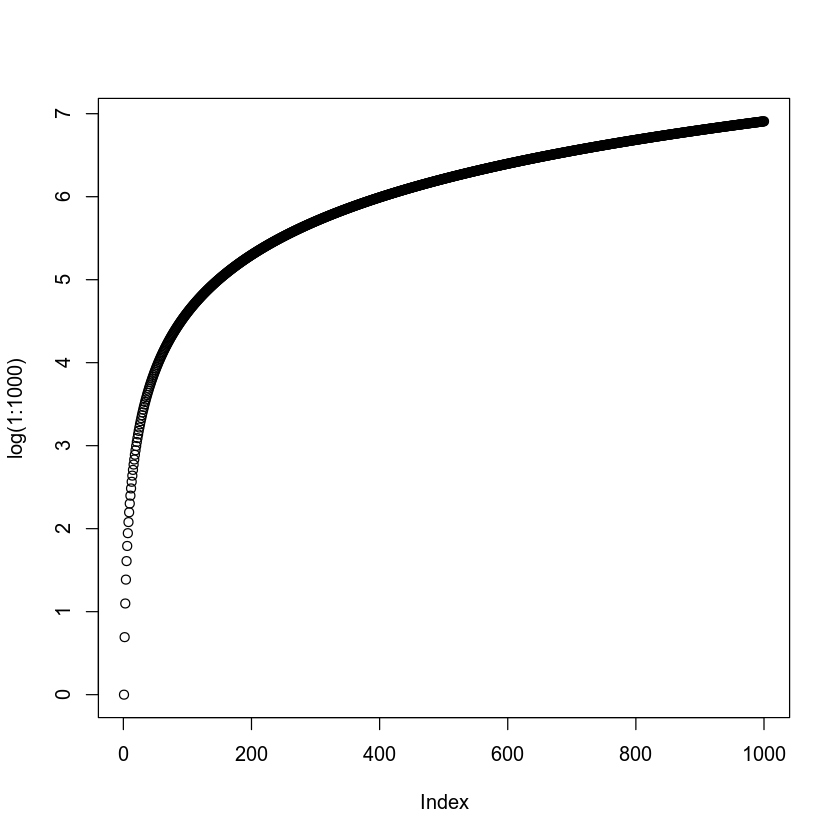

In [23]:
plot(log(1:1000))

_E.g._ an imaginary example with working memory span and age :

In [24]:
obs = 100 #We sampled the WM of 100 persons
mean_wm = 6 #magical number 6
sd_wm = 2 #+/- 2
wm_v = rnorm(obs, mean_wm,sd_wm)#Random number generator see part_2
youngest = 1
oldest = 99
age_v = runif(obs, youngest,oldest)#Random number generator see part_2

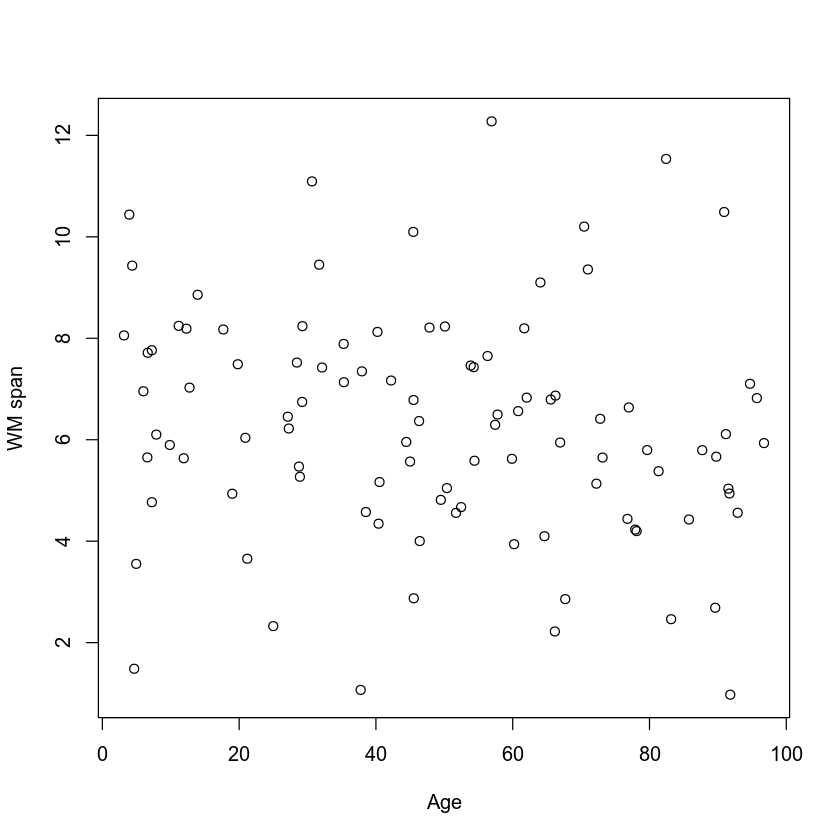

In [25]:
plot(age_v, wm_v, xlab= "Age",ylab="WM span")

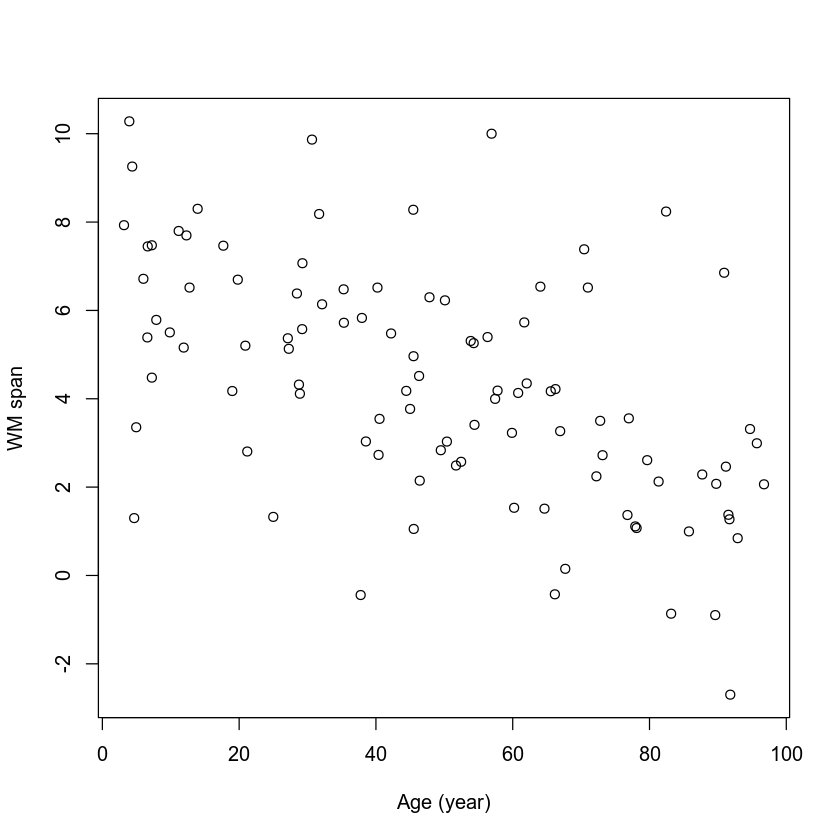

In [26]:
b_age = -0.04 #aging of one unit (e.g. year) decreases the WM of 0.4 unit
plot(age_v, wm_v + (age_v*b_age), xlab="Age (year)", ylab="WM span")
#above is an operation on vector ; 
# for each indiv i : wm_i = wm_v[i] + (age_v[i] * b_age)

## Libraries
R comes with a high number of libraries, _e.g._ :
- ggplot2
- ezANOVA
- rtdists

In [27]:
#install.packages("ggplot2")
library("ggplot2")

`geom_smooth()` using formula 'y ~ x'



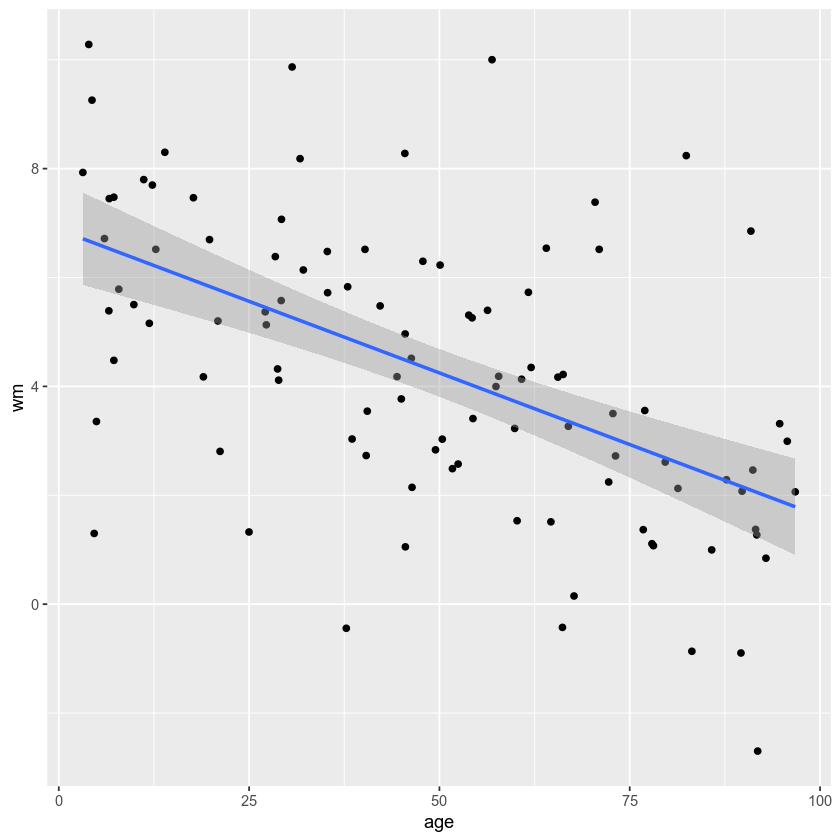

In [28]:
wm_df = data.frame("wm" =  wm_v + (age_v*b_age), "age" = age_v)
ggplot(wm_df, aes(age, wm)) + 
        geom_point() + 
        geom_smooth(method = "lm", se = TRUE)

### Summary of the first part : 
- R is a statistical oriented programming language
- The best way to learn R is to start using it for a project
- The next part aims at showing you __some__ of the possibilities given by R